In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

In [19]:
T = 15
n = 140
sigma = 0.3
h = 0.1
z = 2
k = int(T//h)
chosen_traj = (0, 4, 19, 49, 79, 99)

In [20]:
def generate_trajectory():
    x_h_2 = np.zeros((2*k+1, 2))
    xi = np.array([np.random.normal(0, sigma*np.sqrt(h/2), 2*k+2),
    np.random.normal(0, sigma*np.sqrt(h/2), 2*k+2)]).T
    for i in range(1,2*k+1):
        x_h_2[i] = x_h_2[i-1] + xi[i]
    return x_h_2

trajectories_h_2 = np.array([generate_trajectory() for _ in range(n)])
trajectories_h = trajectories_h_2[:, ::2]
print(trajectories_h_2.shape, trajectories_h.shape)

(140, 299, 2) (140, 150, 2)


C:\Users\User\AppData\Local\Temp\ipykernel_46092\3343441568.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


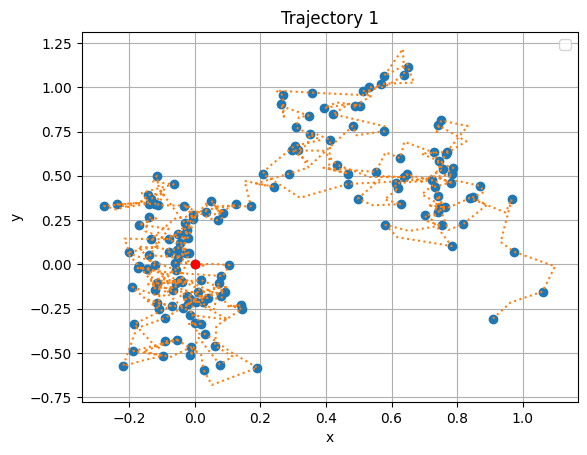

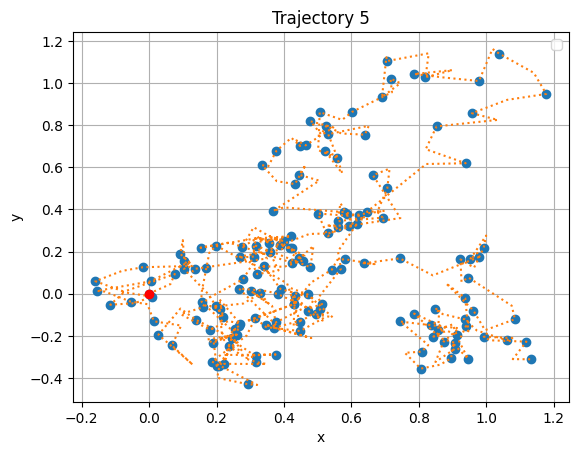

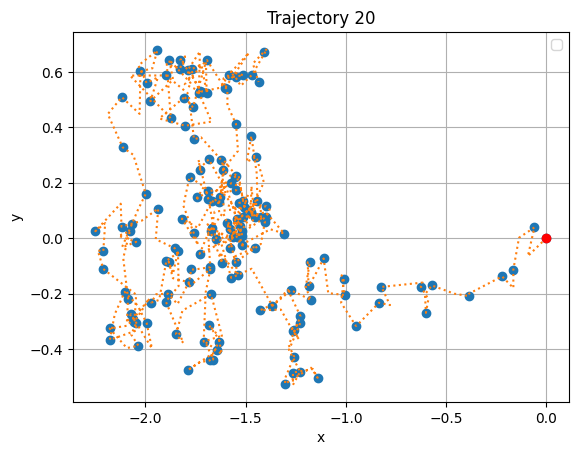

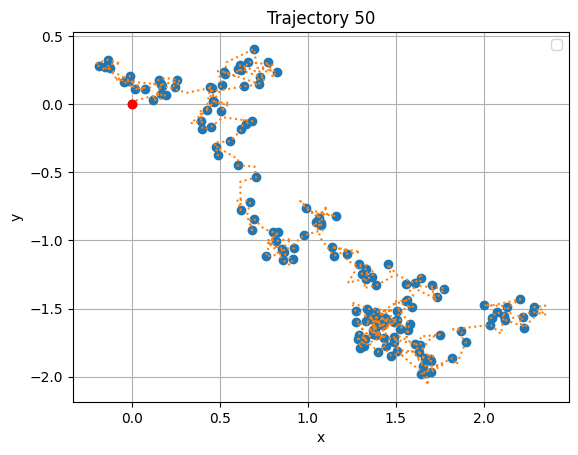

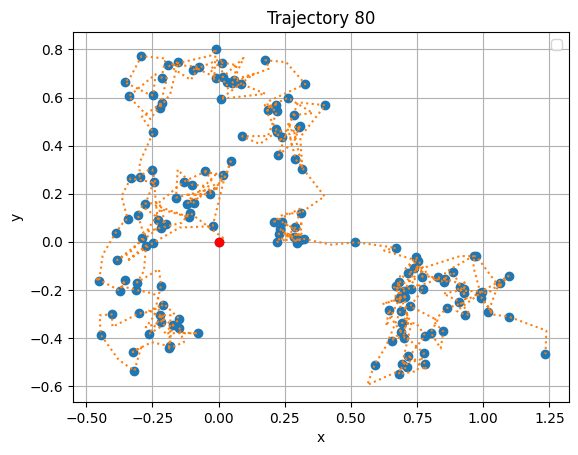

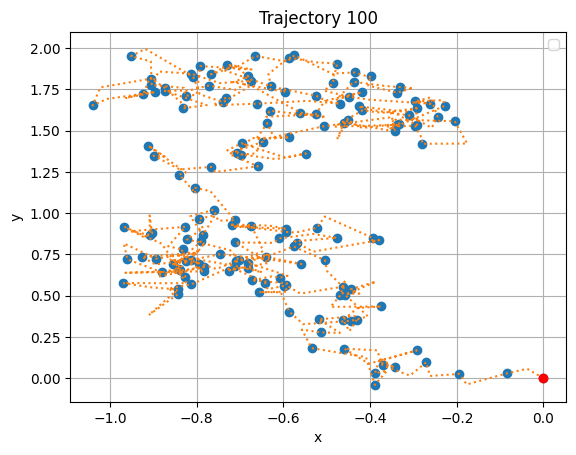

In [21]:
for i, w in enumerate(chosen_traj):
    plt.plot(trajectories_h[w, :, 0], trajectories_h[w, :, 1], 'o')
    plt.plot(trajectories_h_2[w, :, 0], trajectories_h_2[w, :, 1], ':')
    plt.plot(trajectories_h[w, 0, 0], trajectories_h[w, 0, 1], 'o', color="red")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.title(f"Trajectory {w+1}")
    plt.legend()
    plt.show()

In [22]:
trj1 = trajectories_h[chosen_traj, :, :]
diffs = np.diff(trj1, axis=1)
diffs_1 = np.sum(np.abs(diffs), axis=1)
print(diffs_1)

diffs_2 = np.sum(np.abs(diffs)**2, axis=1)
print(diffs_2)

[[11.15918049 11.52042871]
 [11.51376517 11.63427615]
 [10.46172507 12.20768827]
 [10.75074377 10.3984972 ]
 [10.5017289  11.31086393]
 [11.44986196  9.60541014]]
[[1.31541834 1.43418279]
 [1.38402094 1.45238486]
 [1.13790256 1.51139883]
 [1.28988267 1.08069011]
 [1.10106639 1.38646287]
 [1.2466146  1.03921257]]


In [23]:
trj2 = trajectories_h_2[chosen_traj, :, :]
diffs = np.diff(trj2, axis=1)
diffs_1 = np.sum(np.abs(diffs), axis=1)
print(diffs_1)

diffs_2 = np.sum(np.abs(diffs)**2, axis=1)
print(diffs_2)

[[15.40374027 16.1299652 ]
 [16.15179058 16.18500708]
 [15.4891987  16.87293576]
 [15.6024768  15.12530293]
 [14.74492253 15.23283005]
 [15.31005439 15.49318071]]
[[1.23279727 1.4543756 ]
 [1.36857423 1.40467257]
 [1.26727025 1.45643226]
 [1.33846088 1.189566  ]
 [1.15161566 1.23784484]
 [1.18336747 1.28609277]]


In [24]:
P = 1 - chi2(2).cdf(z**2/(sigma**2 * T))
print(P)

0.22730069704883127


In [25]:
count = 0
for tr in trajectories_h:
    x = tr[-1]
    if np.sqrt(x[0]**2 + x[1]**2) > z:
        count += 1
print(count/n)

0.21428571428571427
